In [ ]:
import numpy as np
from matplotlib import pyplot as plt

#### Physical parameters
T = 4000
g = 9.81
Cd = 0.8
rho = 1.217
m0 = 30.3
A = 0.013273
dt = 0.02

#### Program parameters
nt = 10000
x0 = 0
y0 = 0

v0 = 100
theta0 = 9*np.pi/24

#### Fuel consumption 


def RocketEquation(v,theta):
    
    dvdt = (T-0.5*Cd*rho*A*v**2 - m*g*np.sin(theta))/m
    
    return dvdt

def AngleEquation(v,theta):
    
    dthetadt = -g*np.cos(theta)/v
    
    return dthetadt

v = np.zeros(nt)
v[0] = v0
theta = np.zeros(nt)
theta[0] = theta0

def FiniteDiff(nt):
    for n in range(1,nt):
        v[n] = v[n-1] + dt*RocketEquation(v[n-1],theta[n-1])
        theta[n] = theta[n-1] + dt*AngleEquation(v[n-1],theta[n-1])
    return v,theta

def RungeKutta(nt):
    for n in range(1,nt):
        #4th order Runge-Kutta method
        m = m0*(1-n/nt/2)
        kf1 = dt*RocketEquation(v[n-1],theta[n-1])
        kg1 = dt*AngleEquation(v[n-1],theta[n-1])
        kf2 = dt*RocketEquation(v[n-1]+kf1/2,theta[n-1] + kg1/2)
        kg2 = dt*AngleEquation(v[n-1]+kf1/2,theta[n-1] + kg1/2)
        kf3 = dt*RocketEquation(v[n-1]+kf2/2,theta[n-1] + kg2/2)
        kg3 = dt*AngleEquation(v[n-1]+kf2/2,theta[n-1] + kg2/2)
        kf4 = dt*RocketEquation(v[n-1]+kf3,theta[n-1] + kg3)
        kg4 = dt*AngleEquation(v[n-1]+kf3,theta[n-1] + kg3)
        v[n] = v[n-1] + (kf1 + 2*kf2 + 2*kf3 + kf4)/6
        theta[n] = theta[n-1] + (kg1 + 2*kg2 + 2*kg3 + kg4)/6
    return v,theta

v, theta = FiniteDiff(nt)
#v, theta = RungeKutta(nt)

vx = v*np.cos(theta)
vy = v*np.sin(theta)

x = np.cumsum(dt*(vx[2:] - vx[1:-1])+x0)
y = np.cumsum(dt*(vy[2:] - vy[1:-1])+y0)
time = np.linspace(1,nt+1,nt)*0.02

In [ ]:
plt.plot(vx,vy)
plt.xlabel('distance travelled [m]')
plt.ylabel('height [m]')
plt.show()


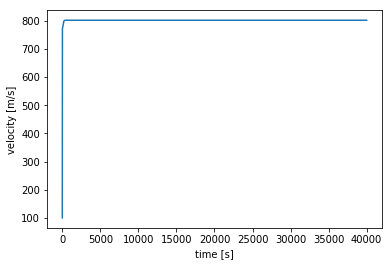

In [80]:
plt.plot(time,v)
plt.xlabel('time [s]')
plt.ylabel('velocity [m/s]')
plt.show()
